In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [7]:
data = pd.read_csv('/content/flipkart_review_data.csv')

In [8]:
data.head()

,Unnamed: 0,ProductUrl,productTitle,productPrice,averageRating,reviewTitle,reviewDescription,reviewAuthor,reviewAt,reviewLikes,reviewDislikes,certifiedBuyer,reviewerLocation,scrapedAt,uniqId
0,0,https://www.flipkart.com/lg-108-cm-43-inch-ult...,LG 108 cm (43 inch) Ultra HD (4K) LED Smart TV,"₹36,499",4.4,Excellent,Very good product,palakollu komali,6 months ago,0,1,True,Tenali,20/02/2022 02:03:42,4e9df8d3-736c-5dae-b867-b92b7f09fc84
1,1,https://www.flipkart.com/lg-108-cm-43-inch-ult...,LG 108 cm (43 inch) Ultra HD (4K) LED Smart TV,"₹36,499",4.4,Really Nice,Nice and super picture quality.and sound also ...,Yogesh Virkar,3 months ago,0,0,True,Mumbai,20/02/2022 02:03:42,7ba04258-9f05-5642-ba33-8982db1f6c5e
2,2,https://www.flipkart.com/lg-108-cm-43-inch-ult...,LG 108 cm (43 inch) Ultra HD (4K) LED Smart TV,"₹36,499",4.4,Super!,This is excellent picture qualityUltimate soun...,Sudhir Kumar Chaudhary,3 months ago,0,0,True,Haridwar,20/02/2022 02:03:42,bfb20e97-eacf-5b76-a5eb-91999d6bd7a3
3,3,https://www.flipkart.com/lg-108-cm-43-inch-ult...,LG 108 cm (43 inch) Ultra HD (4K) LED Smart TV,"₹36,499",4.4,Just wow!,Nice,Flipkart Customer,3 months ago,0,0,True,Allahabad,20/02/2022 02:03:42,b659523f-96e2-50da-a1c0-13a65f410b6a
4,5,https://www.flipkart.com/lg-108-cm-43-inch-ult...,LG 108 cm (43 inch) Ultra HD (4K) LED Smart TV,"₹36,499",4.4,Highly recommended,Don't go with the negative reviews. Just go fo...,Ashok Mandial,3 months ago,0,0,True,Hamirpur District,20/02/2022 02:03:42,4876ae1b-4c7a-52a0-b5e0-dcf88efd1289


In [11]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
stop_words = set(stopwords.words('english'))

In [13]:
def preprocess_text(text):
    tokens = word_tokenize(str(text).lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

In [14]:
data['cleaned_text'] = data['reviewDescription'].apply(preprocess_text)

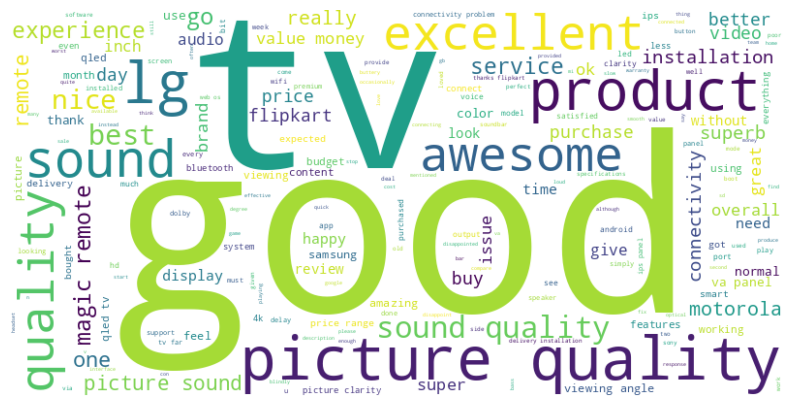

In [16]:
all_reviews = ' '.join(data['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
from textblob import TextBlob

data['sentiment'] = data['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=30, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text'])
feature_names = tfidf_vectorizer.get_feature_names_out()
word_frequencies = tfidf_matrix.sum(axis=0)

word_frequencies_df = pd.DataFrame(word_frequencies, columns=feature_names)

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [20]:
sia = SentimentIntensityAnalyzer()

In [21]:
def get_sentiment_scores(text):
    if isinstance(text, str):
        analysis = TextBlob(text)
        sentiment_score = analysis.sentiment.polarity
        return sentiment_score
    else:
        return None

In [23]:
data['sentiment_scores'] = data['reviewDescription'].apply(get_sentiment_scores)

In [24]:
def categorize_sentiment(sentiment_score):
    if pd.notnull(sentiment_score):
        if sentiment_score > 0:
            return 'positive'
        elif sentiment_score < 0:
            return 'negative'
    return 'neutral'

In [25]:
data['sentiment'] = data['sentiment_scores'].apply(categorize_sentiment)

# Counting the number of positive, negative, and neutral reviews
sentiment_counts = data['sentiment'].value_counts()

In [26]:
print(sentiment_counts)

positive    303
neutral      21
negative     19
Name: sentiment, dtype: int64
